**Predict House Prices**

Dataset Info – kc_house_data.csvView in a new window

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

19 house features plus the price and the id columns, along with 21613 observations.

Column Info –

- id - a notation for a house
- date -Date house was sold
- price- Price is prediction target
- bedrooms- Number of Bedrooms/House
- bathrooms- Number of bathrooms/bedrooms
- sqft_living- square footage of the home
- sqft_lot- square footage of the lot
- floors-Total floors (levels) in house
- waterfront- House which has a view to a waterfront
- view-Has been viewed
- condition-How good the condition is ( Overall )
- grade-overall grade given to the housing unit, based on King County grading system
- sqft_above-square footage of house apart from basement
- sqft_basement-square footage of the basement
- yr_built-Built Year
- yr_renovated-Year when house was renovated
- zipcode-zip
- lat-Latitude coordinate
- long-Longitude coordinate
- sqft_living15-Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area-sqft_lot15
- lotSize area in 2015(implies-- some renovations)

# Import libraries and read the dataset.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df_house = pd.read_csv('kc_house_data-1.csv')

In [3]:
df_house.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [6]:
# exploring data-set
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.4+ MB


In [7]:
df_house.shape

(21613, 21)

**Observation :**
- There are a total of 21613 data points.
- The input variables are all either integer or float datatype.
- The target variable(price) is of the datatype integer.

# Explore Data Analysis. Find out how one variable related to other and distributions of data.

In [10]:
df_house.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [15]:
# Dropping the columns which has negligile effect.
df_house.drop('id', axis = 1, inplace = True)
df_house.drop('date', axis = 1, inplace = True)

In [18]:
print("Skewness: ", df_house['price'].skew())
print("Kurtosis: ", df_house['price'].kurt())

Skewness:  4.024069144684712
Kurtosis:  34.58554043194243


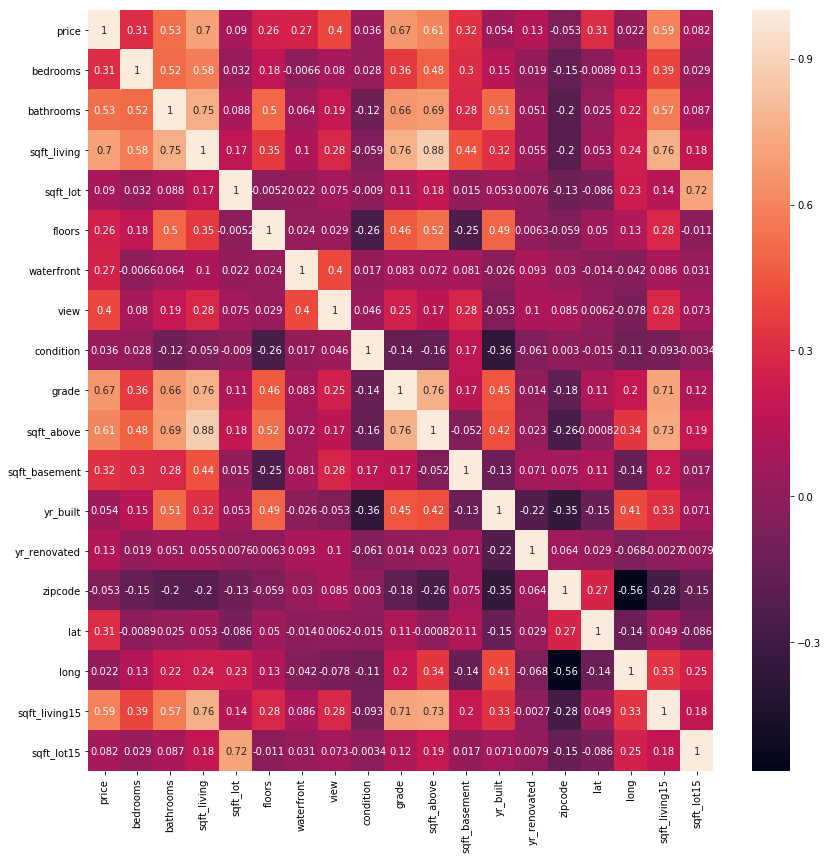

In [19]:
# Correlation analysis
corrmat = df_house.corr()
plt.subplots(figsize = (14,14))
sns.heatmap(corrmat, annot=True)

**Observation :**
- Positively correlated against price > 0.6
- sqftliving vs Price grade vs Price sqftabove vs Price
- Positively correlated against bathrooms
- bathrooms vs sqft_above bathrooms vs grade bathrooms vs sqftliving
- sqftliving vs sqftliving15 sqftliving vs grade sqftliving vs sqft_above

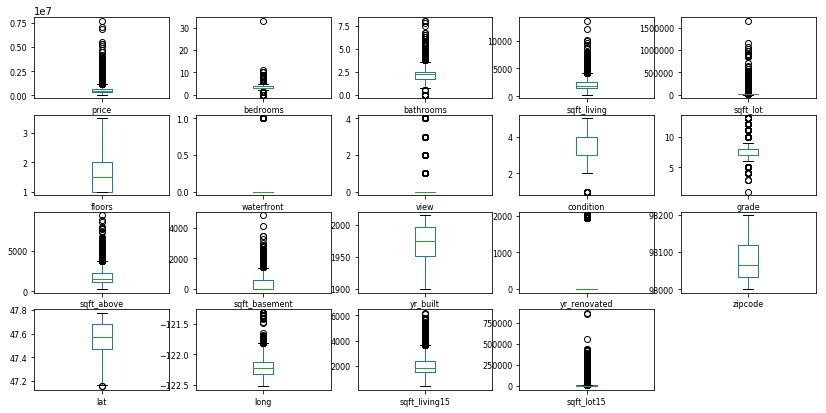

In [17]:
# Outlier detection
df_house.plot(kind='box', subplots=True, layout=(8,5), fontsize=8, figsize=(14,14))
plt.show()